In [1]:
import os
import getpass

api_key = getpass.getpass("Enter OPENAI_API_KEY: ")
os.environ['OPENAI_API_KEY'] = api_key

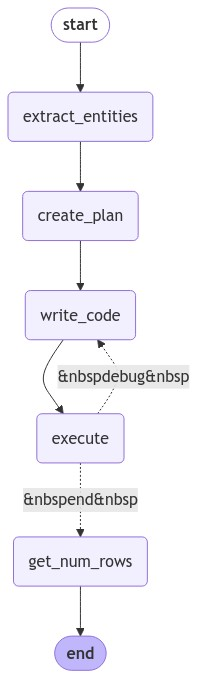

In [2]:
from IPython.display import Image, display
from agent import graph
from utils.utils import extract_content

# Visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
import pandas as pd

# Read Sample question
questions = pd.read_csv('data/questions.csv')
sample_question = questions.iloc[20]

print(sample_question['question'])

On average, how much more expensive are schools near the squares within 100 meters compared to those further away in 1740?


In [4]:
from utils.utils import get_openai_llm

# Initialize the OpenAI model
llm = get_openai_llm(seed=42)

In [5]:
# Run the graph
final_state = graph.invoke({
    "llm": llm,
    "question": sample_question['question'],
    "answer_format": sample_question['answer_format'],
    "num_steps": 0
})

/scratch/students/saydalie/.conda/envs/venice_env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
print('*** References ***')
print(final_state['references'], end='\n\n')

print('*** Entities ***')
print(final_state['entities'], end='\n\n')

print('*** Plan ***')
print(final_state['plan'], end='\n\n')

print('*** Code ***')
print(final_state['code'], end='\n\n')

print('*** Answer ***', end='\n\n')
print(final_state['code_output'], end='\n\n')

print('*** Information Score ***')
print(final_state['num_rows'], end='\n\n')

*** References ***
[{'expensive': {'dataset': 'data/buildings_1740.csv', 'column': 'rent_price'}}]

*** Entities ***
[{'schools': {'dataset': 'data/buildings_1740.csv', 'column': 'building_functions', 'matches': ['scuola']}}, {'squares': {'dataset': 'data/landmarks.csv', 'column': 'landmark_type', 'matches': ['square']}}]

*** Plan ***
1. **Load the Datasets**: Begin by loading the three datasets: the 1740 Buildings Dataset, the 1808 Buildings Dataset, and the Landmarks Dataset into a suitable data analysis environment (e.g., a pandas DataFrame in Python).

2. **Filter for Schools**: From the 1740 Buildings Dataset, filter the rows where the `building_functions` column contains the term "scuola". This will give us a subset of the dataset that includes only the buildings serving as schools.

3. **Identify Squares**: From the Landmarks Dataset, filter for rows where the `landmark_type` is "square". This will provide a list of all squares in Venice.

4. **Calculate Proximity to Squares**:

In [8]:
print("Answer: ", extract_content(final_state['code_output']))
print("Information Score: ", extract_content(final_state['num_rows']))

Answer:  -62.5
Information Score:  4
